In [1]:
# Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from scipy.special import expit
import sys

In [2]:
# Read the dataset
diabetes = pd.read_csv("data.csv")
diabetes.head()

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
X = diabetes.drop(labels=['Outcome'], axis=1)
y = diabetes['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [4]:
X_train = X_train.apply(pd.to_numeric)
X_test = X_test.apply(pd.to_numeric)
y_train = y_train.apply(pd.to_numeric)
y_test = y_test.apply(pd.to_numeric)

In [11]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [12]:
# Define the sigmoid activator;
def sigmoid_act(x, der=False):
    if (der==True) : #derivative of the sigmoid
        f = 1/(1+ np.exp(- x))*(1-1/(1+ np.exp(- x)))
    else : # sigmoid
        f = 1/(1+ np.exp(- x))
    return f

# Define the ReLU activator if needed;
def ReLU_act(x, der=False):
    if (der == True): # the derivative of the ReLU is the Heaviside Theta
        f = np.heaviside(x, 1)
    else :
        f = np.maximum(x, 0)
    return f

In [19]:
import matplotlib.pyplot as plt
def ANN_train(X_train, Y_train, p=4, eta=0.0015):
    # 0: Random initialize the relevant data 
    w1 = 2*np.random.rand(p , X_train.shape[1]) - 0.5 # Layer 1
    b1 = np.random.rand(p)

    wOut = 2*np.random.rand(p) - 0.5   # Output Layer
    bOut = np.random.rand(1)

    mu = []
    vec_y = []

    # Start looping over the training data
    for I in range(0, X_train.shape[0]-1): #loop in all the passengers:
    
        # 1: input the data 
        x = X_train[I]
    
        # 2: Start the algorithm
        # 2.1: Feed forward
        z1 = ReLU_act(np.dot(w1, x) + b1) # output of the Hidden layer  
        y = sigmoid_act(np.dot(wOut, z1) + bOut) # Output of the Output layer
    
        #2.2: Compute the output layer's error
        delta_Out = 2 * (y-Y_train[I]) * sigmoid_act(y, der=True)
    
        #2.3: Backpropagate
        delta_2 = delta_Out * wOut * ReLU_act(z1, der=True) # Hidden Layer Error
    
        # 3: Gradient descent 
        wOut = wOut - eta*delta_Out*z1  # Outer Layer
        bOut = bOut - eta*delta_Out

        w1 = w1 - eta*np.kron(delta_2, x).reshape(p, x.shape[0]) # Hidden Layer
        b1 = b1 - eta*delta_2
    
        # 4. Computation of the loss function
        mu.append((y-Y_train[I])**2)
        vec_y.append(y)
    
    batch_loss = []
    for i in range(0, 10):
        loss_avg = 0
        for m in range(0, 60):
            loss_avg+=vec_y[60*i+m]/60
        batch_loss.append(loss_avg)
    
    
    plt.figure(figsize=(10,6))
    plt.scatter(np.arange(1, len(batch_loss)+1), batch_loss, alpha=1, s=10, label='error')
    plt.title('Averege Loss by epoch', fontsize=20)
    plt.xlabel('Epoch', fontsize=16)
    plt.ylabel('Loss', fontsize=16)
    plt.show()
    
    return w1, b1, wOut, bOut, mu

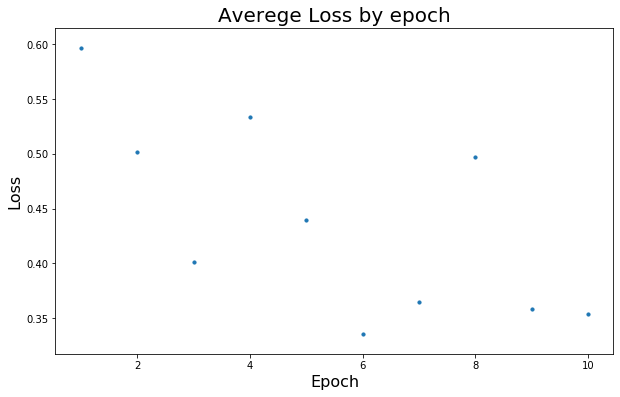

In [35]:
w1, b1, wOut, bOut, mu = ANN_train(X_train, y_train, p=X_train.shape[1], eta=0.0015)

In [30]:
def ANN_pred(X_test, w1, b1, wOut, bOut, mu):
    pred = []
    
    for I in range(0, X_test.shape[0]): #loop in all the passengers
        # 1: input the data 
        x = X_test[I]
        
        # 2.1: Feed forward
        z1 = ReLU_act(np.dot(w1, x) + b1) # output of the Hidden layer  
        y = sigmoid_act(np.dot(wOut, z1) + bOut)  # Output of the Output layer
        
        # Append the prediction;
        # We now need a binary classifier; we this apply an Heaviside Theta and we set to 0.5 the threshold
        # if y < 0.5 the output is zero, otherwise is 1
        pred.append( np.heaviside(y - 0.5, 1)[0] )    
    return np.array(pred)

In [31]:
predictions = ANN_pred(X_test, w1, b1, wOut, bOut, mu)

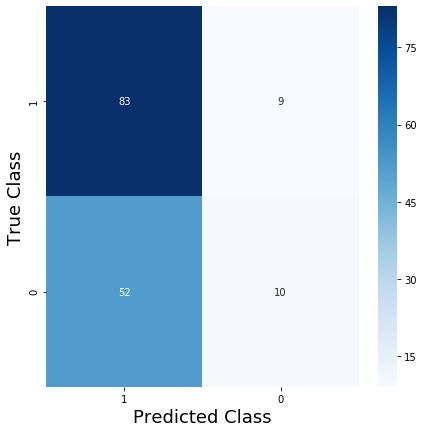

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Plot the confusion matrix
cm = confusion_matrix(y_test, predictions)

df_cm = pd.DataFrame(cm, index = [1,0], columns = [1,0])
plt.figure(figsize = (7,7))
sns.heatmap(df_cm, annot=True, cmap=plt.cm.Blues, fmt='g')
plt.xlabel("Predicted Class", fontsize=18)
plt.ylabel("True Class", fontsize=18)
plt.show()

In [1]:
def get_model_summary():
    print("---------------------------------------------------------------")
    print("Layer            | Neurons            | Activation            |")
    print("---------------------------------------------------------------")
    print("Input(0)         | 8                  |                       |")
    print("---------------------------------------------------------------")
    print("Hidden(1)        | 4                  | ReLU                  |")
    print("---------------------------------------------------------------")
    print("Output(2)        | 1                  | Sigmoid               |")
    print("---------------------------------------------------------------")

In [2]:
get_model_summary()

---------------------------------------------------------------
Layer            | Neurons            | Activation            |
---------------------------------------------------------------
Input(0)         | 8                  |                       |
---------------------------------------------------------------
Hidden(1)        | 4                  | ReLU                  |
---------------------------------------------------------------
Output(2)        | 1                  | Sigmoid               |
---------------------------------------------------------------
